In [1]:
# Libraries
from pathlib import Path

import pandas as pd

from MRdataset import import_dataset
from mrQA import check_compliance
from MRdataset.config import PARAMETER_NAMES
from collections import defaultdict

In [2]:
ONEURO_DIR = Path('/media/sinhah/extremessd/open_neuro')
dataset_folders = ['ds004217', 'ds004146', 'ds004103', 'ds004169',
                   'ds002345', 'ds002785', 'ds002843', 'ds000030',
                   'ds000202', 'ds003826', 'ds000221', 'ds000228',
                   'ds004169', 'ds003647', 'ds004114', 'ds004116']
dataset_paths = []
dataset_obj = []

if not ONEURO_DIR.exists():
    raise FileNotFoundError

for folder in ONEURO_DIR.iterdir():
    if folder.is_dir():
        folder_name = folder.name.split('-')[0]
        if folder_name in dataset_folders:
            dataset_paths.append(folder)

for ds in dataset_paths:
    name = ds.name.split('-')[0]
    dataset = import_dataset(data_root=ds,
                             ds_format='bids',
                             name=name,
                             reindex=False,
                             verbose=False,
                             include_phantom=False)
    dataset = check_compliance(dataset=dataset,
                     output_dir=ONEURO_DIR)
    dataset_obj.append(dataset)

In [35]:
import numbers
import pandas as pd

all_te = {}
for d in dataset_obj:
    if d.name in ['ds004114', 'ds004146', 'ds000221', 'ds004116', 'ds004103']:
        dte = {}
        for m in d.modalities:
            mte = []
            for s in m.subjects:
                for se in s.sessions:
                    for r in se.runs:
                        # if isinstance(r.echo_time, str):
                        #
                        if isinstance(r.echo_time, numbers.Number):
                            # if r.echo_time not in mte:
                            #     mte[r.echo_time] = []
                            if r.echo_time != 1:
                                mte.append(r.echo_time)
                        # else:
                        #     print(r.echo_time)
            dte[m.name] = mte.copy()
        all_te[d.name] = dte

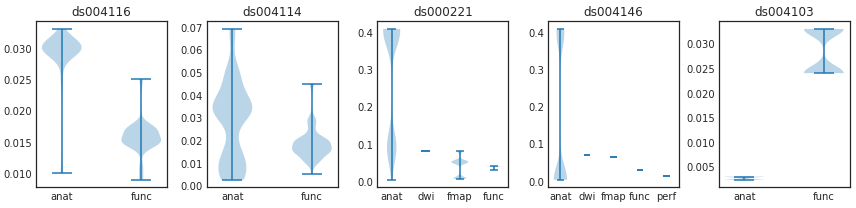

In [36]:
import matplotlib.pyplot as plt
import numpy as np

bplots = []
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(1, 5, figsize=(12,3))
    for i, id in enumerate(all_te):
        ds = all_te[id]
        bplot = ax[i].violinplot(ds.values()),
        bplots.append(bplot)
        labels = list(ds.keys())
        ax[i].xaxis.set_ticks_position('bottom')
        ax[i].set_xticks(np.arange(1, len(labels) + 1))#, labels=labels)
        ax[i].set_xticklabels(labels)
        ax[i].set_title(id)
    fig.tight_layout()
    # plt.show()
    plt.savefig('/home/sinhah/te_vplot.png')



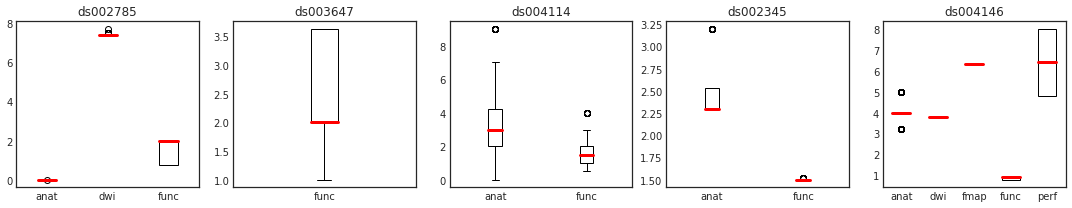

In [38]:
import numbers
import pandas as pd

all_tr = {}
for d in dataset_obj:
    if d.name in ['ds002345', 'ds002785', 'ds004146', 'ds004114', 'ds003647']:
        dtr = {}
        for m in d.modalities:
            mtr = []
            for s in m.subjects:
                for se in s.sessions:
                    for r in se.runs:
                        # print(r.params)
                        value = r.params.get('RepetitionTime', None)
                        if not value:
                            continue
                        if isinstance(value, numbers.Number):
                            mtr.append(value)
                        # else:
                        #     print(value)
            if mtr:
                dtr[m.name] = mtr.copy()
        all_tr[d.name] = dtr

with plt.style.context('seaborn-white'):
    boxprops = dict(facecolor='white')
    medianprops = dict(linestyle='-', linewidth=3, color='red')
    fig, ax = plt.subplots(1, 5, figsize=(15,3))
    for i, id in enumerate(all_tr):
        ds = all_tr[id]
        ax[i].boxplot(ds.values(),
                              patch_artist=True,
                              boxprops=boxprops,
                              medianprops=medianprops,
                              )
        ax[i].set_xticklabels(ds.keys())
        ax[i].set_title(id)
    fig.tight_layout()
    # plt.show()
    plt.savefig('/home/sinhah/tr.png')


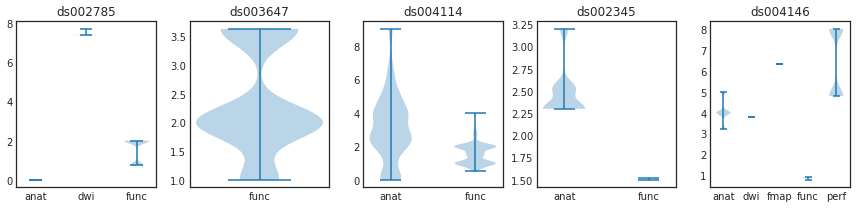

In [39]:
import matplotlib.pyplot as plt
import numpy as np

bplots = []
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(1, 5, figsize=(12,3))
    for i, id in enumerate(all_tr):
        ds = all_tr[id]
        bplot = ax[i].violinplot(ds.values())
        bplots.append(bplot)
        labels = list(ds.keys())
        ax[i].xaxis.set_ticks_position('bottom')
        ax[i].set_xticks(np.arange(1, len(labels) + 1))#, labels=labels)
        ax[i].set_xticklabels(labels)
        ax[i].set_title(id)
    fig.tight_layout()
    # plt.show()
    plt.savefig('/home/sinhah/tr_vplot.png')



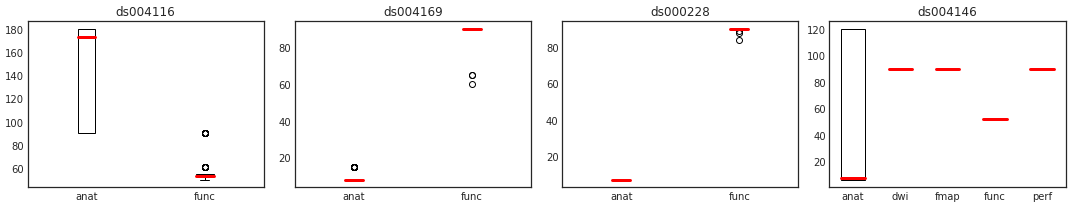

In [40]:
all_fa = {}
for d in dataset_obj:
    if d.name in ['ds000228', 'ds004169', 'ds004146', 'ds004116']:
        dfa = {}
        for m in d.modalities:
            mfa = []
            for s in m.subjects:
                for se in s.sessions:
                    for r in se.runs:
                        # print(r.params)
                        value = r.params.get('FlipAngle', None)
                        if not value:
                            continue
                        if isinstance(value, numbers.Number):
                            mfa.append(value)
                        else:
                            print(value)
            if mfa:
                dfa[m.name] = mfa.copy()
        all_fa[d.name] = dfa

with plt.style.context('seaborn-white'):
    boxprops = dict(facecolor='white')
    medianprops = dict(linestyle='-', linewidth=3, color='red')

    fig, ax = plt.subplots(1, 4, figsize=(15,3))
    for i, id in enumerate(all_fa):
        ds = all_fa[id]
        ax[i].boxplot(ds.values(),
                              patch_artist=True,
                              boxprops=boxprops,
                              medianprops=medianprops,
                              )
        ax[i].set_xticklabels(ds.keys())
        ax[i].set_title(id)
    fig.tight_layout()
    # plt.show(
    plt.savefig('/home/sinhah/fa.png')


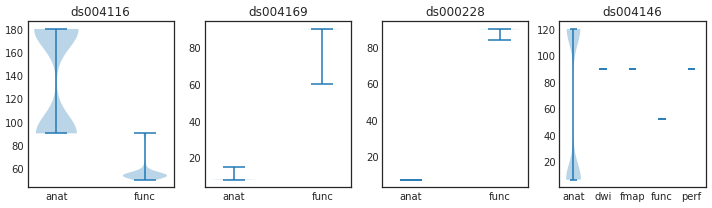

In [51]:
import matplotlib.pyplot as plt
import numpy as np

bplots = []
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(1, 4, figsize=(10,3))
    for i, id in enumerate(all_fa):
        ds = all_fa[id]
        bplot = ax[i].violinplot(ds.values()),
        bplots.append(bplot)
        labels = list(ds.keys())
        ax[i].xaxis.set_ticks_position('bottom')
        ax[i].set_xticks(np.arange(1, len(labels) + 1))#, labels=labels)
        ax[i].set_xticklabels(labels)
        ax[i].set_title(id)
    fig.tight_layout()
    # plt.show()
    plt.savefig('/home/sinhah/fa_vplot.png')



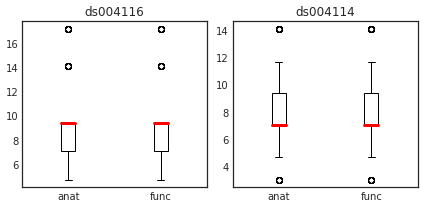

In [44]:
all_b0 = {}
for d in dataset_obj:
    if d.name in ['ds004116', 'ds004114']:
        db0 = {}
        for m in d.modalities:
            mb0 = []
            for s in m.subjects:
                for se in s.sessions:
                    for r in se.runs:
                        # print(r.params)
                        value = r.params.get('MagneticFieldStrength', None)
                        if not value:
                            continue
                        if isinstance(value, numbers.Number):
                            mb0.append(value)
                        elif value == '9.4T':
                            mb0.append(9.4)
                        else:
                            print(value)
            if mb0:
                db0[m.name] = mb0.copy()
        all_b0[d.name] = db0

with plt.style.context('seaborn-white'):
    boxprops = dict(facecolor='white')
    medianprops = dict(linestyle='-', linewidth=3, color='red')

    fig, ax = plt.subplots(1, 2, figsize=(6,3))
    for i, id in enumerate(all_b0):
        ds = all_b0[id]
        ax[i].boxplot(ds.values(),
                              patch_artist=True,
                              boxprops=boxprops,
                              medianprops=medianprops,
                              )
        ax[i].set_xticklabels(ds.keys())
        ax[i].set_title(id)
    fig.tight_layout()
    # plt.show()
    plt.savefig('/home/sinhah/b0.png')

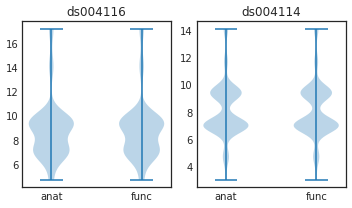

In [53]:
import matplotlib.pyplot as plt
import numpy as np

bplots = []
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(1, 2, figsize=(5,3))
    for i, id in enumerate(all_b0):
        ds = all_b0[id]
        bplot = ax[i].violinplot(ds.values()),
        bplots.append(bplot)
        labels = list(ds.keys())
        ax[i].xaxis.set_ticks_position('bottom')
        ax[i].set_xticks(np.arange(1, len(labels) + 1))#, labels=labels)
        ax[i].set_xticklabels(labels)
        ax[i].set_title(id)
    fig.tight_layout()
    # plt.show()
    plt.savefig('/home/sinhah/b0_vplot.png')



In [370]:
all_b0 = {}
valid_ped = ['i', 'i-', 'j', 'j-']
counts = [0, 0, 0, 0]
for d in dataset_obj:
    if d.name in ['ds002843', 'ds000030', 'ds004146', 'ds000221']:
        db0 = {}
        for m in d.modalities:
            mb0 = [0, 0, 0 ,0]
            for s in m.subjects:
                for se in s.sessions:
                    for r in se.runs:
                        # print(r.params)
                        value = r.params.get('PhaseEncodingDirection', None)
                        if not value:
                            continue
                        if value in valid_ped:
                            mb0[valid_ped.index(value)] += 1
                        else:
                            print(value)
            if sum(mb0) > 0:
                db0[m.name] = [m/sum(mb0) for m in mb0]
        all_b0[d.name] = db0



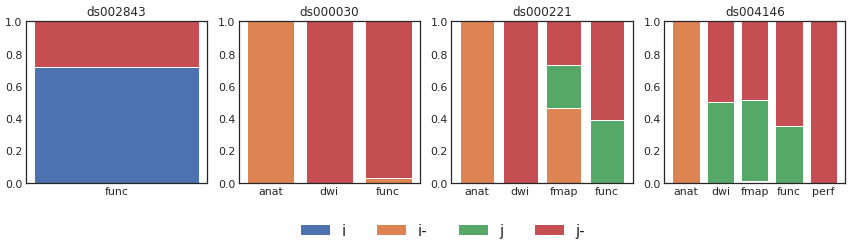

In [372]:
fields = valid_ped
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
# labels = valid_ped

with plt.style.context('seaborn-white'):
    # boxprops = dict(facecolor='white')
    # medianprops = dict(linestyle='-', linewidth=3, color='red')

    fig, ax = plt.subplots(1, 4, figsize=(12,3))
    for i, id in enumerate(all_b0):
        ds = all_b0[id]
        ys = list(map(list, zip(*ds.values())))
        index = list(range(1, len(ds)+1))
        prev = [0]*len(ds)
        for j in ys:
            # if not prev:
            #     line = ax[i].bar(index, j)
            # else:
            line = ax[i].bar(index, j, bottom=prev)
            prev = [sum(x) for x in zip(prev, j)]
            # ax[j].pie(ds[m], labels=valid_ped)
        ax[i].xaxis.set_ticks(index)
        ax[i].xaxis.set_ticklabels(ds.keys())
        ax[i].set_title(id)
        ax[i].set_ylim([0.0, 1.0])
        # ax[i].legend(valid_ped)
        # break
    fig.tight_layout()
    lgd = fig.legend(valid_ped, loc='upper right', bbox_to_anchor=(0.7,0), ncol=len(valid_ped), bbox_transform=fig.transFigure, prop={'size': 15})
    # plt.ylim(0,1.0)
    # plt.show()
    plt.savefig('/home/sinhah/ped.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

